### Importing Libraries

In [29]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
df=pd.read_csv("C:\\Users\\dell\\Desktop\\ai_financial_market_daily_realistic_synthetic.csv")

In [31]:
df

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09
...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 10959 non-null  object 
 1   Company              10959 non-null  object 
 2   R&D_Spending_USD_Mn  10959 non-null  float64
 3   AI_Revenue_USD_Mn    10959 non-null  float64
 4   AI_Revenue_Growth_%  10959 non-null  float64
 5   Event                233 non-null    object 
 6   Stock_Impact_%       10959 non-null  float64
dtypes: float64(4), object(3)
memory usage: 599.4+ KB


### convert datatype of Date column into DateTime formate


In [33]:
df["Date"] = pd.to_datetime(df["Date"])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 10959 non-null  datetime64[ns]
 1   Company              10959 non-null  object        
 2   R&D_Spending_USD_Mn  10959 non-null  float64       
 3   AI_Revenue_USD_Mn    10959 non-null  float64       
 4   AI_Revenue_Growth_%  10959 non-null  float64       
 5   Event                233 non-null    object        
 6   Stock_Impact_%       10959 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 599.4+ KB


In [35]:
df.head(5)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09


### Company name

In [36]:
df["Company"].unique()

array(['OpenAI', 'Google', 'Meta'], dtype=object)

### Create a new column for 'Year' only

In [37]:
df["Year"] = df["Date"].dt.year

In [38]:
df.head(2)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015


### Handling missing value

In [39]:
df.isnull().sum()

Date                       0
Company                    0
R&D_Spending_USD_Mn        0
AI_Revenue_USD_Mn          0
AI_Revenue_Growth_%        0
Event                  10726
Stock_Impact_%             0
Year                       0
dtype: int64

In [49]:
df["Event"]= df["Event"].fillna(df["Event"].mode()[0])

In [53]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,AI speech recognition release,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,AI speech recognition release,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,AI speech recognition release,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,AI speech recognition release,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,AI speech recognition release,-0.09,2015


### How much amount the companies spent on R & D

In [74]:
print("Company spending for R & D in $Bn")
RD=df.groupby("Company")["R&D_Spending_USD_Mn"].sum()/1000
RD

Company spending for R & D in $Bn


Company
Google    423.34114
Meta      264.53307
OpenAI     26.48277
Name: R&D_Spending_USD_Mn, dtype: float64

### Draw a bar plot to show the amount spent on R & D by the companies

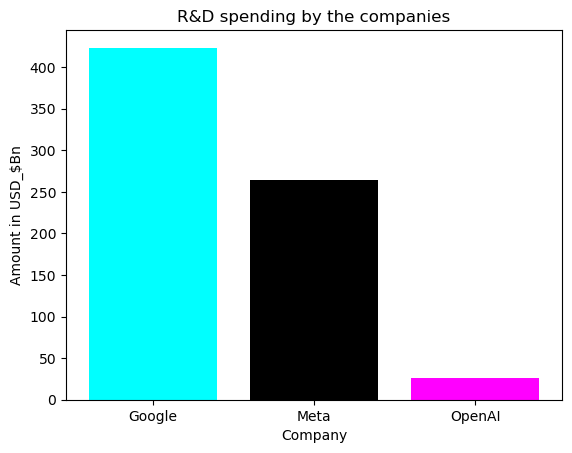

In [81]:
plt.bar(RD.index,RD.values,color= ["cyan","black","magenta"])
plt.title("R&D spending by the companies")
plt.xlabel("Company")
plt.ylabel("Amount in USD_$Bn")
plt.show()

### Revenue Earned by the companies

In [71]:
print("Company AI_Revenue_USD_Bn")
revenue = df.groupby("Company")["AI_Revenue_USD_Mn"].sum()/1000
revenue

Company
Google    284.49838
Meta      189.62182
OpenAI      9.46289
Name: AI_Revenue_USD_Mn, dtype: float64

### Draw a bar plot to show the Revenue of the companies

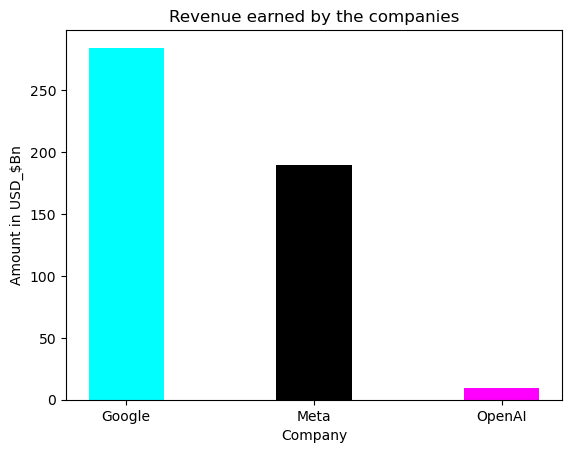

In [80]:
plt.bar(revenue.index,revenue.values,color = ["cyan","black","magenta"],width=0.4)
plt.title("Revenue earned by the companies")
plt.xlabel("Company")
plt.ylabel("Amount in USD_$Bn")
plt.show()

### Bar plots to show expenditure & revenue of the companies

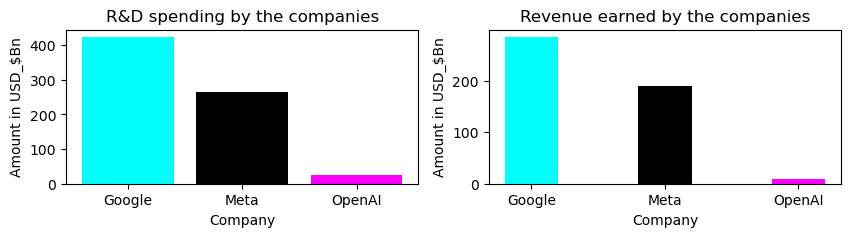

In [84]:
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
plt.bar(RD.index,RD.values,color= ["cyan","black","magenta"])
plt.title("R&D spending by the companies")
plt.xlabel("Company")
plt.ylabel("Amount in USD_$Bn")
plt.subplot(1,2,2)
plt.bar(revenue.index,revenue.values,color = ["cyan","black","magenta"],width=0.4)
plt.title("Revenue earned by the companies")
plt.xlabel("Company")
plt.ylabel("Amount in USD_$Bn")
plt.show()

### Datewise impact on the stock 

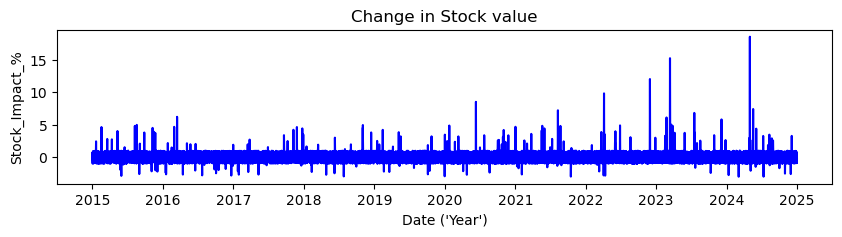

In [93]:
plt.figure(figsize=(10,2))
plt.plot(df["Date"],df["Stock_Impact_%"],color= "blue")
plt.title("Change in Stock value")
plt.xlabel("Date ('Year')")
plt.ylabel("Stock_Impact_%")
plt.show()

### Creating separate dataframes

In [104]:
OpenAI =df[df["Company"]=="OpenAI"]
OpenAI

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,AI speech recognition release,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,AI speech recognition release,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,AI speech recognition release,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,AI speech recognition release,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,AI speech recognition release,-0.09,2015
...,...,...,...,...,...,...,...,...
3648,2024-12-27,OpenAI,10.06,4.71,370.69,AI speech recognition release,0.93,2024
3649,2024-12-28,OpenAI,9.67,5.32,432.15,AI speech recognition release,-0.25,2024
3650,2024-12-29,OpenAI,9.17,5.46,445.74,AI speech recognition release,0.47,2024
3651,2024-12-30,OpenAI,10.36,6.31,530.88,AI speech recognition release,0.69,2024


In [105]:
Google=df[df["Company"]=="Google"]
Google

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3653,2015-01-01,Google,79.89,30.19,0.64,AI speech recognition release,-0.02,2015
3654,2015-01-02,Google,78.99,30.44,1.47,AI speech recognition release,-0.98,2015
3655,2015-01-03,Google,79.20,30.46,1.53,AI speech recognition release,0.78,2015
3656,2015-01-04,Google,79.59,30.55,1.82,AI speech recognition release,-0.41,2015
3657,2015-01-05,Google,81.50,30.59,1.97,AI speech recognition release,-0.78,2015
...,...,...,...,...,...,...,...,...
7301,2024-12-27,Google,162.16,155.36,417.88,AI speech recognition release,-0.46,2024
7302,2024-12-28,Google,159.69,154.47,414.89,AI speech recognition release,-0.48,2024
7303,2024-12-29,Google,161.69,154.59,415.31,AI speech recognition release,0.72,2024
7304,2024-12-30,Google,158.48,155.05,416.84,AI speech recognition release,-0.17,2024


In [106]:
Meta=df[df["Company"]=="Meta"]
Meta

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
7306,2015-01-01,Meta,50.39,18.95,-5.23,AI speech recognition release,-0.42,2015
7307,2015-01-02,Meta,49.80,19.77,-1.16,AI speech recognition release,0.63,2015
7308,2015-01-03,Meta,49.09,19.96,-0.21,AI speech recognition release,0.73,2015
7309,2015-01-04,Meta,50.66,20.48,2.38,AI speech recognition release,-0.26,2015
7310,2015-01-05,Meta,51.36,19.84,-0.80,AI speech recognition release,-0.37,2015
...,...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,AI speech recognition release,-0.66,2024
10955,2024-12-28,Meta,99.12,102.37,411.86,AI speech recognition release,-0.57,2024
10956,2024-12-29,Meta,98.95,103.11,415.54,AI speech recognition release,-0.52,2024
10957,2024-12-30,Meta,100.74,103.21,416.03,AI speech recognition release,0.22,2024


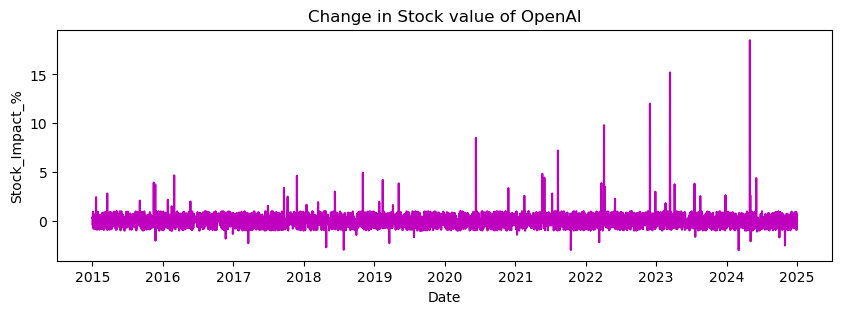

In [112]:
plt.figure(figsize=(10,3))
plt.plot(OpenAI["Date"],OpenAI["Stock_Impact_%"],color="m")
plt.title("Change in Stock value of OpenAI")
plt.xlabel("Date")
plt.ylabel("Stock_Impact_%")
plt.show()

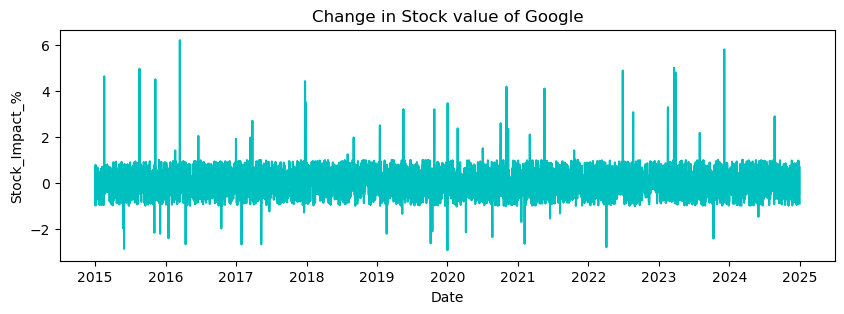

In [113]:
plt.figure(figsize=(10,3))
plt.plot(Google["Date"],Google["Stock_Impact_%"],color="c")
plt.title("Change in Stock value of Google")
plt.xlabel("Date")
plt.ylabel("Stock_Impact_%")
plt.show()

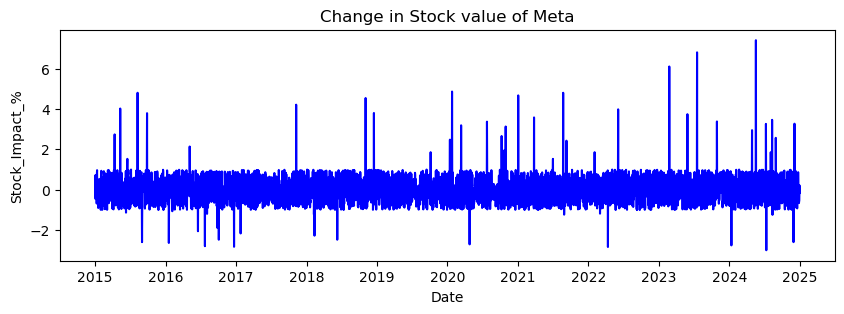

In [115]:
plt.figure(figsize=(10,3))
plt.plot(Meta["Date"],Meta["Stock_Impact_%"],color="b")
plt.title("Change in Stock value of Meta")
plt.xlabel("Date")
plt.ylabel("Stock_Impact_%")
plt.show()

### Events when maximum stock impact was observed

In [117]:
OpenAI.sort_values(by="Stock_Impact_%",ascending= False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3408,2024-05-01,OpenAI,10.91,5.34,434.27,GPT-5 release (predicted),18.50,2024
2994,2023-03-14,OpenAI,7.78,4.05,304.57,GPT-4 release,15.20,2023
2890,2022-11-30,OpenAI,10.60,3.18,217.72,ChatGPT (GPT-3.5) launch,12.00,2022
2652,2022-04-06,OpenAI,9.24,3.48,247.93,DALL·E 2 release,9.80,2022
1988,2020-06-11,OpenAI,5.90,2.62,161.56,GPT-3 release,8.50,2020
...,...,...,...,...,...,...,...,...
3590,2024-10-30,OpenAI,11.05,5.27,427.50,AI-powered search update,-2.52,2024
1212,2018-04-27,OpenAI,5.38,1.76,76.47,AI ethics policy update,-2.70,2018
1303,2018-07-27,OpenAI,7.44,0.97,-2.63,AI-powered search update,-2.95,2018
2480,2021-10-16,OpenAI,8.39,2.78,178.28,AI Ads Optimization upgrade,-2.98,2021


In [119]:
Google.sort_values(by="Stock_Impact_%",ascending= False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
4092,2016-03-15,Google,84.56,36.22,20.73,AlphaGo beats Lee Sedol,6.20,2016
6914,2023-12-06,Google,146.59,129.17,330.55,Gemini AI release,5.80,2023
6654,2023-03-21,Google,149.34,129.76,332.53,Bard chatbot launch,5.00,2023
3883,2015-08-19,Google,79.27,30.89,2.98,AI partnership deal,4.96,2015
6388,2022-06-28,Google,137.71,107.96,259.85,AI ethics policy update,4.88,2022
...,...,...,...,...,...,...,...,...
4122,2016-04-14,Google,87.19,36.08,20.28,AI partnership deal,-2.67,2016
4412,2017-01-29,Google,92.21,43.25,44.17,AI Ads Optimization upgrade,-2.68,2017
6303,2022-04-04,Google,138.00,106.81,256.04,AI Video Recommendation upgrade,-2.80,2022
3803,2015-05-31,Google,81.14,29.30,-2.32,Cloud AI launch,-2.87,2015


In [120]:

Meta.sort_values(by="Stock_Impact_%",ascending= False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
10731,2024-05-18,Meta,103.64,103.05,415.23,LLaMA 3 release (predicted),7.40,2024
10426,2023-07-18,Meta,92.44,85.67,328.37,LLaMA 2 release,6.80,2023
10282,2023-02-24,Meta,93.71,86.98,334.89,LLaMA 1 release,6.10,2023
9156,2020-01-25,Meta,72.73,49.10,145.49,Cloud AI launch,4.86,2020
9732,2021-08-23,Meta,78.19,59.36,196.79,Cloud AI launch,4.80,2021
...,...,...,...,...,...,...,...,...
10604,2024-01-12,Meta,99.37,104.28,421.42,AI Video Recommendation upgrade,-2.75,2024
7875,2016-07-23,Meta,53.76,23.97,19.83,AI-powered search update,-2.79,2016
8026,2016-12-21,Meta,53.18,23.42,17.11,AI-powered search update,-2.82,2016
9964,2022-04-12,Meta,84.90,71.99,259.95,AI ethics policy update,-2.83,2022


### AI Revenue  Growth of the companies

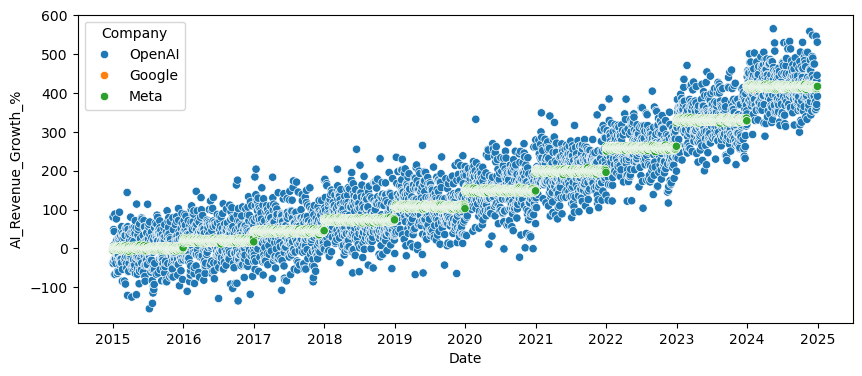

In [125]:
plt.figure(figsize=(10,4))
sns.scatterplot(x="Date",y="AI_Revenue_Growth_%",data=df,hue="Company")
plt.show()

In [126]:
df.sort_values(by=["AI_Revenue_Growth_%"])

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
189,2015-07-09,OpenAI,5.66,-0.55,-155.43,AI speech recognition release,0.70,2015
205,2015-07-25,OpenAI,5.23,-0.42,-141.61,AI speech recognition release,-0.62,2015
649,2016-10-11,OpenAI,5.37,-0.35,-135.31,AI speech recognition release,0.12,2016
548,2016-07-02,OpenAI,5.19,-0.29,-129.11,AI speech recognition release,-0.31,2016
98,2015-04-09,OpenAI,4.80,-0.25,-125.50,AI speech recognition release,-0.56,2015
...,...,...,...,...,...,...,...,...
3508,2024-08-09,OpenAI,9.92,6.33,532.86,AI speech recognition release,0.77,2024
3645,2024-12-24,OpenAI,8.79,6.46,546.07,AI speech recognition release,0.45,2024
3627,2024-12-06,OpenAI,8.51,6.49,548.83,AI speech recognition release,-0.15,2024
3612,2024-11-21,OpenAI,10.16,6.59,558.70,AI speech recognition release,0.63,2024


### OpenAI, AI Revenue Growth year-by-year

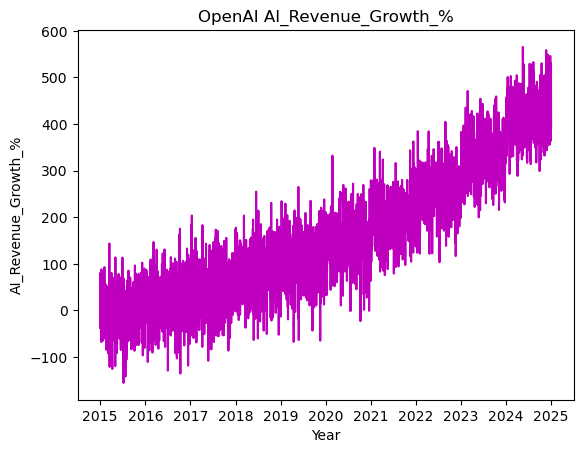

In [131]:
plt.plot(OpenAI["Date"],OpenAI["AI_Revenue_Growth_%"],color="m")
plt.title("OpenAI AI_Revenue_Growth_%")
plt.xlabel("Year")
plt.ylabel("AI_Revenue_Growth_%")
plt.show()

### Google, AI Revenue Growth year-by-year

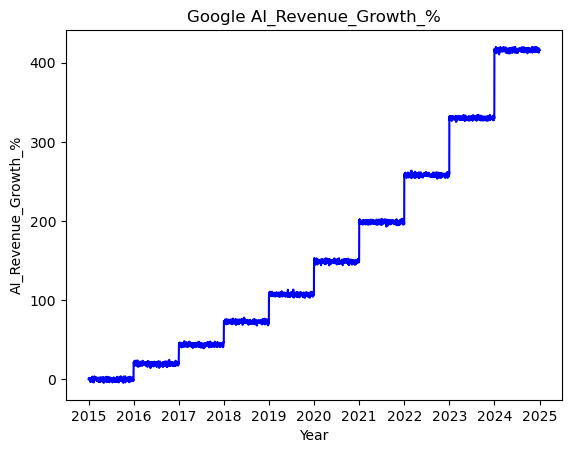

In [132]:
plt.plot(Google["Date"],Google["AI_Revenue_Growth_%"],color="b")
plt.title("Google AI_Revenue_Growth_%")
plt.xlabel("Year")
plt.ylabel("AI_Revenue_Growth_%")
plt.show()

### Meta, AI Revenue Growth year-by-year

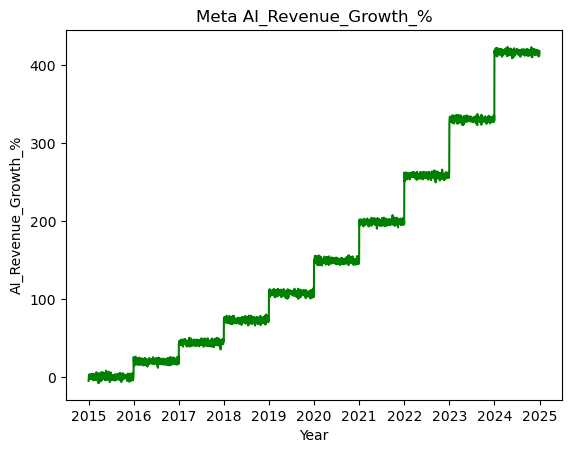

In [140]:
plt.plot(Meta["Date"],Meta["AI_Revenue_Growth_%"],color="g")
plt.title("Meta AI_Revenue_Growth_%")
plt.xlabel("Year")
plt.ylabel("AI_Revenue_Growth_%")
plt.show()

### Correlation between the columns

<Axes: >

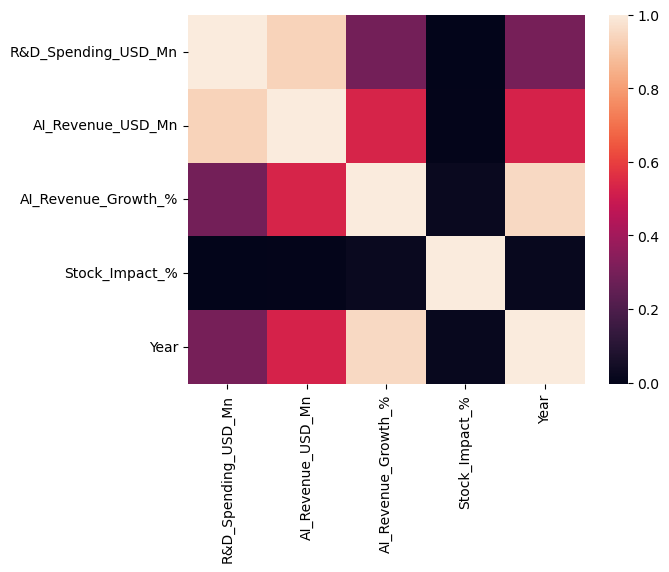

In [141]:
sns.heatmap(df.corr(numeric_only=True))

### Expenditure vs Revenue year-by-year

In [144]:
spend=df.groupby("Year")["R&D_Spending_USD_Mn"].sum()
spend

Year
2015    49304.23
2016    53349.94
2017    57475.12
2018    62002.16
2019    67071.51
2020    72602.53
2021    78207.32
2022    84390.17
2023    91193.92
2024    98760.08
Name: R&D_Spending_USD_Mn, dtype: float64

### Showing the amount spent on R&D

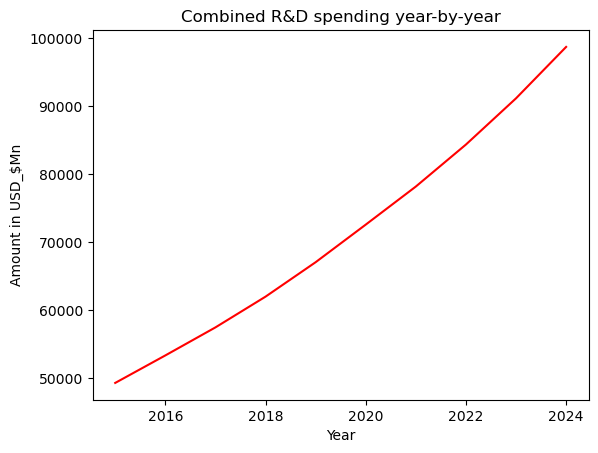

In [146]:
plt.plot(spend.index,spend.values, color="r")
plt.title("Combined R&D spending year-by-year")
plt.xlabel("Year")
plt.ylabel("Amount in USD_$Mn")
plt.show()

In [148]:
revenue =df.groupby("Year")["AI_Revenue_USD_Mn"].sum()
revenue

Year
2015    18623.21
2016    22361.20
2017    26776.80
2018    32164.44
2019    38580.32
2020    46456.19
2021    55591.14
2022    66674.24
2023    80041.64
2024    96313.91
Name: AI_Revenue_USD_Mn, dtype: float64

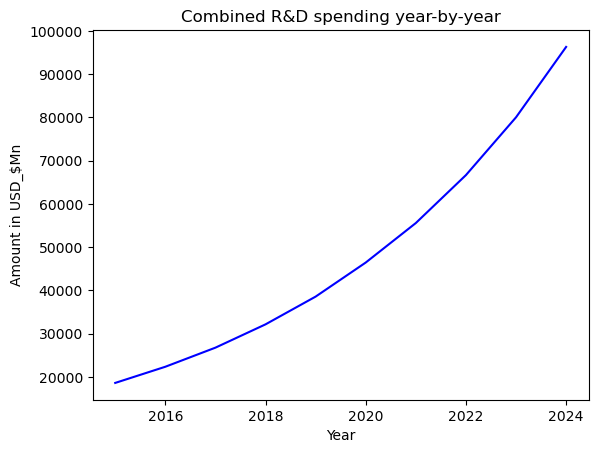

In [151]:
# showing the revenue earned 
plt.plot(revenue.index,revenue.values, color="b")
plt.title("Combined R&D spending year-by-year")
plt.xlabel("Year")
plt.ylabel("Amount in USD_$Mn")
plt.show()

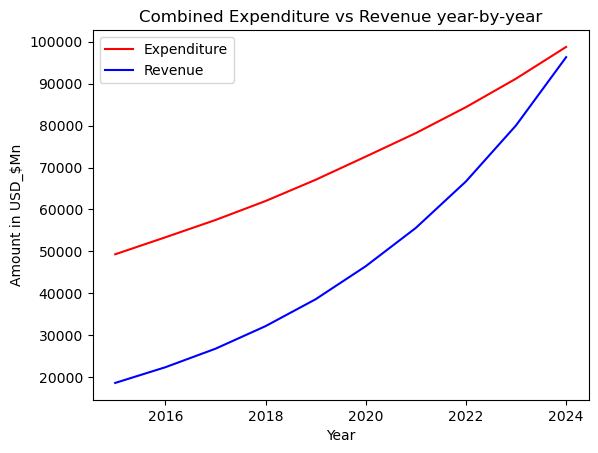

In [156]:
 plt.plot(spend.index,spend.values, color="r")
plt.plot(revenue.index,revenue.values, color="b")
plt.title("Combined Expenditure vs Revenue year-by-year")
plt.xlabel("Year")
plt.ylabel("Amount in USD_$Mn")
plt.legend(["Expenditure","Revenue"])
plt.show()

### Pairplot to show the relations between the columns

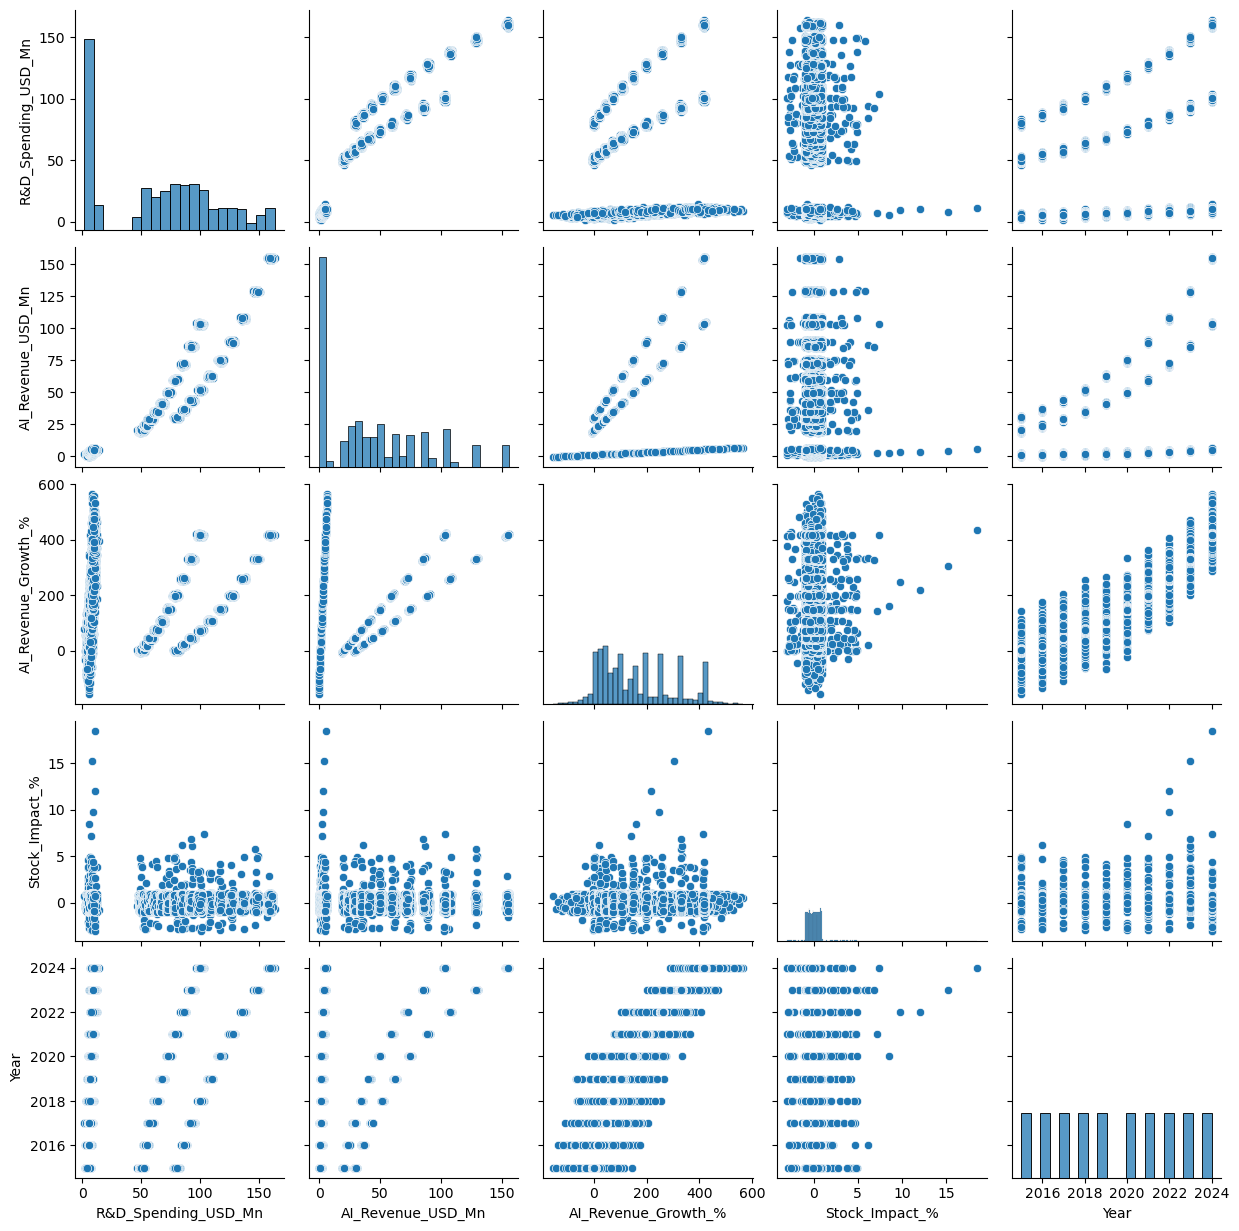

In [157]:
sns.pairplot(df)

### Event Impact Analysis

In [158]:
df["Event"].value_counts()

Event
AI speech recognition release      10763
AI-powered search update              32
AI Ads Optimization upgrade           32
AI partnership deal                   32
AI Video Recommendation upgrade       29
AI ethics policy update               27
Cloud AI launch                       27
TensorFlow open-source release         1
LLaMA 2 release                        1
LLaMA 1 release                        1
Gemini AI release                      1
Bard chatbot launch                    1
MUM Search Model launch                1
BERT for Search launch                 1
AlphaGo beats Lee Sedol                1
ChatGPT (GPT-3.5) launch               1
GPT-5 release (predicted)              1
GPT-4 release                          1
DALL·E 2 release                       1
Codex release                          1
GPT-3 release                          1
GPT-2 release                          1
GPT-1 release                          1
LLaMA 3 release (predicted)            1
Name: coun

In [163]:
# checking for a particular event
df[df["Event"]=="TensorFlow open-source release"]

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3965,2015-11-09,Google,79.62,29.84,-0.53,TensorFlow open-source release,4.5,2015


In [160]:
tf = df.loc[ 3955: 3975]
tf

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3955,2015-10-30,Google,80.33,29.87,-0.43,AI speech recognition release,0.43,2015
3956,2015-10-31,Google,79.53,30.30,0.99,AI speech recognition release,-0.84,2015
3957,2015-11-01,Google,80.37,29.86,-0.48,AI speech recognition release,0.57,2015
3958,2015-11-02,Google,77.89,29.97,-0.10,AI speech recognition release,0.76,2015
3959,2015-11-03,Google,81.00,29.43,-1.89,AI speech recognition release,-0.45,2015
3960,2015-11-04,Google,80.70,29.71,-0.96,AI speech recognition release,-2.17,2015
3961,2015-11-05,Google,78.31,30.25,0.85,AI speech recognition release,0.31,2015
3962,2015-11-06,Google,79.08,29.84,-0.54,AI speech recognition release,-0.72,2015
3963,2015-11-07,Google,79.65,30.34,1.14,AI speech recognition release,0.58,2015
3964,2015-11-08,Google,79.63,29.74,-0.86,AI speech recognition release,-0.61,2015


### Showing the Impact with a line chart

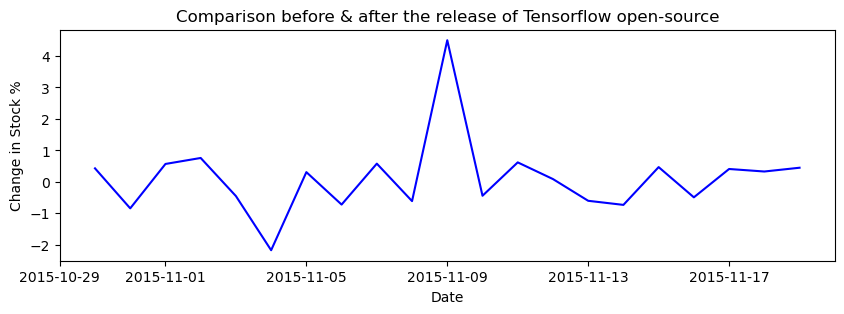

In [162]:
plt.figure(figsize=(10,3))
plt.plot(tf["Date"],tf["Stock_Impact_%"], color="b")
plt.title("Comparison before & after the release of Tensorflow open-source")
plt.xlabel("Date")
plt.ylabel("Change in Stock %")
plt.show()

In [164]:
# checking for a particular event
df[df["Event"]=="GPT-4 release"]

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
2994,2023-03-14,OpenAI,7.78,4.05,304.57,GPT-4 release,15.2,2023


In [166]:
gpt= df.loc[ 2984: 3004]
gpt

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
2984,2023-03-04,OpenAI,10.59,4.26,326.43,AI speech recognition release,-0.28,2023
2985,2023-03-05,OpenAI,8.24,3.58,257.92,AI speech recognition release,-0.48,2023
2986,2023-03-06,OpenAI,9.32,4.21,320.60,AI speech recognition release,0.89,2023
2987,2023-03-07,OpenAI,8.52,4.13,313.16,AI speech recognition release,-0.08,2023
2988,2023-03-08,OpenAI,8.90,3.63,263.03,AI speech recognition release,-0.56,2023
2989,2023-03-09,OpenAI,8.44,4.64,363.84,AI speech recognition release,0.91,2023
2990,2023-03-10,OpenAI,9.55,4.83,383.49,AI speech recognition release,-0.02,2023
2991,2023-03-11,OpenAI,8.34,3.95,294.67,AI speech recognition release,0.19,2023
2992,2023-03-12,OpenAI,8.71,3.57,256.88,AI speech recognition release,-0.87,2023
2993,2023-03-13,OpenAI,10.61,5.19,419.06,AI speech recognition release,0.53,2023


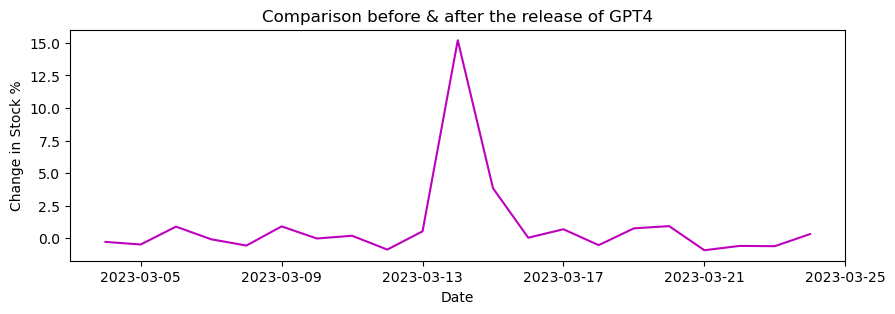

In [167]:
plt.figure(figsize=(10,3))
plt.plot(gpt["Date"],gpt["Stock_Impact_%"], color="m")
plt.title("Comparison before & after the release of GPT4")
plt.xlabel("Date")
plt.ylabel("Change in Stock %")
plt.show()

### Daily Average impact on the stock of the companies

In [168]:
df.groupby("Company")["Stock_Impact_%"].mean()*100

Company
Google    2.620860
Meta      0.976184
OpenAI    4.070901
Name: Stock_Impact_%, dtype: float64

### Daily Average Expenditure on R & D by the companies

In [169]:
df.groupby("Company")["R&D_Spending_USD_Mn"].mean()

Company
Google    115.888623
Meta       72.415294
OpenAI      7.249595
Name: R&D_Spending_USD_Mn, dtype: float64

### Maximum impact % on a company stock

In [170]:
df.groupby("Company")["Stock_Impact_%"].max()

Company
Google     6.2
Meta       7.4
OpenAI    18.5
Name: Stock_Impact_%, dtype: float64

### highest change in the index

In [172]:
stocks =df.groupby(["Year","Company"])["Stock_Impact_%"].max()
stocks

Year  Company
2015  Google      4.96
      Meta        4.80
      OpenAI      3.92
2016  Google      6.20
      Meta        2.14
      OpenAI      4.66
2017  Google      4.42
      Meta        4.21
      OpenAI      4.63
2018  Google      1.97
      Meta        4.54
      OpenAI      4.94
2019  Google      3.20
      Meta        1.86
      OpenAI      4.20
2020  Google      4.18
      Meta        4.86
      OpenAI      8.50
2021  Google      4.10
      Meta        4.80
      OpenAI      7.20
2022  Google      4.88
      Meta        3.98
      OpenAI     12.00
2023  Google      5.80
      Meta        6.80
      OpenAI     15.20
2024  Google      2.89
      Meta        7.40
      OpenAI     18.50
Name: Stock_Impact_%, dtype: float64

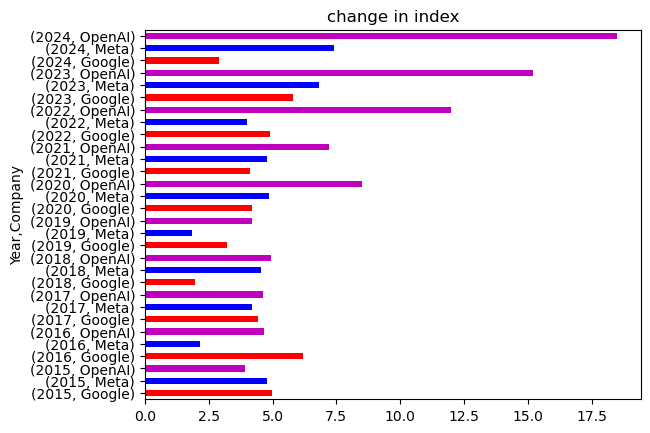

In [173]:
stocks.plot(kind="barh",color=["r","b","m"])
plt.title("change in index")
plt.show()